# Scraping

In [21]:
import pandas as pd

In [15]:
re.findall(r"\w+@\w+\.com", "This is a long sentence dating trouni@gmail.com back from 1997 when whatever 2020")

['trouni@gmail.com']

In [16]:
response = requests.get("https://www.imdb.com/list/ls055386972/", headers={"Accept-Language":"en-US"})
soup = BeautifulSoup(response.content, "html.parser")

In [18]:
movies = []

for movie in soup.find_all("div", class_="lister-item-content"):
    title = movie.find("h3").find("a").string
    duration = int(movie.find(class_="runtime").string.strip(' min'))
    year = int(re.search(r"\d{4}", movie.find(class_="lister-item-year").string).group(0))
    movies.append({'title': title, 'duration': duration, 'year': year})
print(movies[0])

{'title': 'The Godfather', 'duration': 175, 'year': 1972}


In [22]:
movies_df = pd.DataFrame(movies)
movies_df.head()

,title,duration,year
0,The Godfather,175,1972
1,Schindler's List,195,1993
2,12 Angry Men,96,1957
3,Life Is Beautiful,116,1997
4,"The Good, the Bad and the Ugly",178,1966


## Top 250 movies

In [27]:
for page in range(5):
    start_from = page * 50 + 1
    print(f'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start={start_from}&ref_=adv_nxt')

https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt


In [44]:
from movies import fetch_page, parse_movies

In [34]:
all_movies = []
for page in range(5):
    print(f"Parsing page {page + 1}...")
    soup = fetch_page(page)
    all_movies += parse_movies(soup)
print("Done")

Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Done


In [36]:
len(all_movies)

250

In [39]:
all_movies_df = pd.DataFrame(all_movies)

In [40]:
all_movies_df

,title,duration,year
0,The Shawshank Redemption,142,1994
1,The Godfather,175,1972
2,The Dark Knight,152,2008
3,The Godfather: Part II,202,1974
4,The Lord of the Rings: The Return of the King,201,2003
...,...,...,...
245,The General,67,1926
246,The Help,146,2011
247,"Monsters, Inc.",92,2001
248,Aladdin,90,1992


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

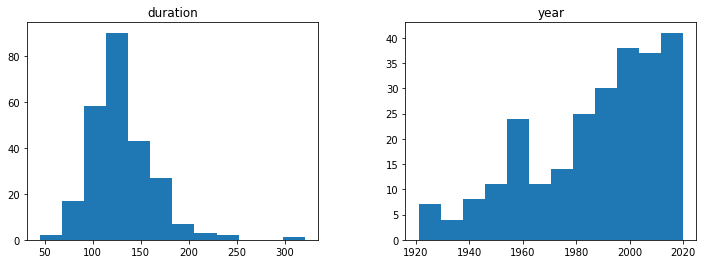

In [43]:
all_movies_df.hist(grid=False, bins=12, figsize=(12, 4))